In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

Описание импортов:

numpy — для работы с массивами и математическими операциями.

pandas — для анализа и обработки табличных данных.

matplotlib.pyplot as plt — библиотека для визуализации данных (графики, гистограммы, диаграммы и др.).

import seaborn as sns — для визуализации данных.

train_test_split — разделение данных на обучающую и тестовую выборки.

StandardScaler - масштабирование данных.

OneHotEncoder - преобразование категориальных признаков в бинарные.

ColumnTransformer - разные преобразования для разных столбцов.

Pipeline - объединение шагов обработки и модели в одну цепочку.

SimpleImputer - заполнение пропущенных значений.

LogisticRegression - линейная модель для классификации.

f1_score - метрика качества для классификации.

In [2]:
# Загрузка данных
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### Анализ

In [3]:
train_data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,id
0,Aakash,Male,47,Agra,Working Professional,Teacher,NaN,1.0,NaN,NaN,5.0,Less than 5 hours,Unhealthy,B.Arch,Yes,11,5,Yes,0,1
1,Asha,Female,25,Chennai,Student,NaN,3.0,NaN,6.59,1.0,NaN,7-8 hours,Healthy,BSc,No,9,3,No,0,2
2,Samar,Male,56,Indore,Working Professional,Data Scientist,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,B.Tech,No,2,4,Yes,0,3
3,Chhavi,Female,24,Kalyan,Student,NaN,2.0,NaN,5.77,2.0,NaN,5-6 hours,Moderate,MBBS,Yes,5,3,No,1,4
4,Anand,Male,55,Kanpur,Working Professional,Researcher,NaN,1.0,NaN,NaN,2.0,7-8 hours,Unhealthy,BSc,Yes,4,4,No,0,5


In [4]:
test_data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,id
0,Raghav,Male,59,Kolkata,Working Professional,Content Writer,NaN,1.0,NaN,NaN,1.0,Less than 5 hours,Healthy,ME,No,10,1,No,1
1,Shlok,Male,45,Indore,Working Professional,Plumber,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,PhD,Yes,0,1,Yes,2
2,Saurav,Male,42,Nagpur,Working Professional,Digital Marketer,NaN,3.0,NaN,NaN,4.0,5-6 hours,Healthy,M.Com,No,12,2,Yes,3
3,Dhruv,Male,34,Lucknow,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,7-8 hours,Unhealthy,B.Com,No,12,5,No,4
4,Shreya,Female,36,Kolkata,Working Professional,Plumber,NaN,4.0,NaN,NaN,2.0,7-8 hours,Moderate,BE,Yes,7,3,Yes,5


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   1891 non-null   object 
 1   Gender                                 1891 non-null   object 
 2   Age                                    1891 non-null   int64  
 3   City                                   1891 non-null   object 
 4   Working Professional or Student        1891 non-null   object 
 5   Profession                             1380 non-null   object 
 6   Academic Pressure                      382 non-null    float64
 7   Work Pressure                          1509 non-null   float64
 8   CGPA                                   382 non-null    float64
 9   Study Satisfaction                     382 non-null    float64
 10  Job Satisfaction                       1509 non-null   float64
 11  Slee

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   665 non-null    object 
 1   Gender                                 665 non-null    object 
 2   Age                                    665 non-null    int64  
 3   City                                   665 non-null    object 
 4   Working Professional or Student        665 non-null    object 
 5   Profession                             503 non-null    object 
 6   Academic Pressure                      120 non-null    float64
 7   Work Pressure                          545 non-null    float64
 8   CGPA                                   120 non-null    float64
 9   Study Satisfaction                     120 non-null    float64
 10  Job Satisfaction                       545 non-null    float64
 11  Sleep 

In [7]:
print(train_data.isna().sum())

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                511
Academic Pressure                        1509
Work Pressure                             382
CGPA                                     1509
Study Satisfaction                       1509
Job Satisfaction                          382
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
id                                          0
dtype: int64


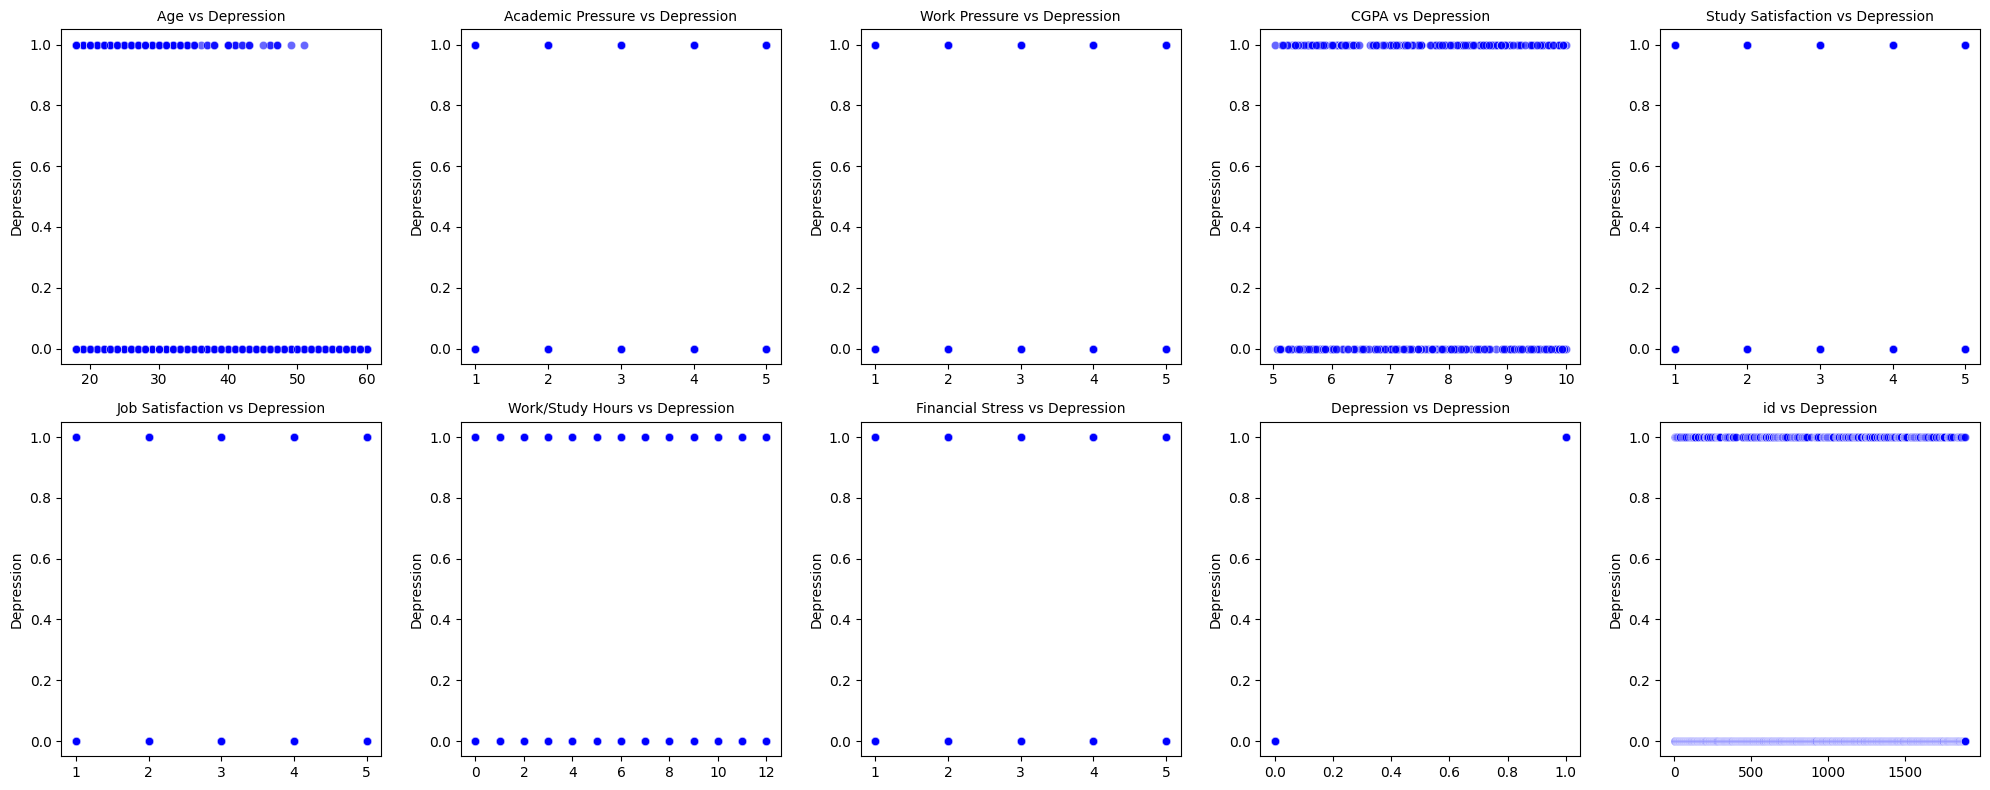

In [8]:
# Выбираем числовые колонки (включая Depression)
num_cols = train_data.select_dtypes(exclude=['object'])

# Создаем сетку графиков
n_cols = 5
n_rows = int(np.ceil(len(num_cols.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Строим scatterplot для каждого признака
for i, col in enumerate(num_cols.columns):
    ax = axes.flatten()[i]
    sns.scatterplot(
        x=train_data[col],
        y=train_data['Depression'],
        ax=ax,
        alpha=0.6,
        color='blue'
    )
    ax.set_title(f'{col} vs Depression', fontsize=10)
    ax.set_xlabel('')

# Скрываем пустые графики
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Использование диаграмм рассеяния в данном случае не дает полезной информации

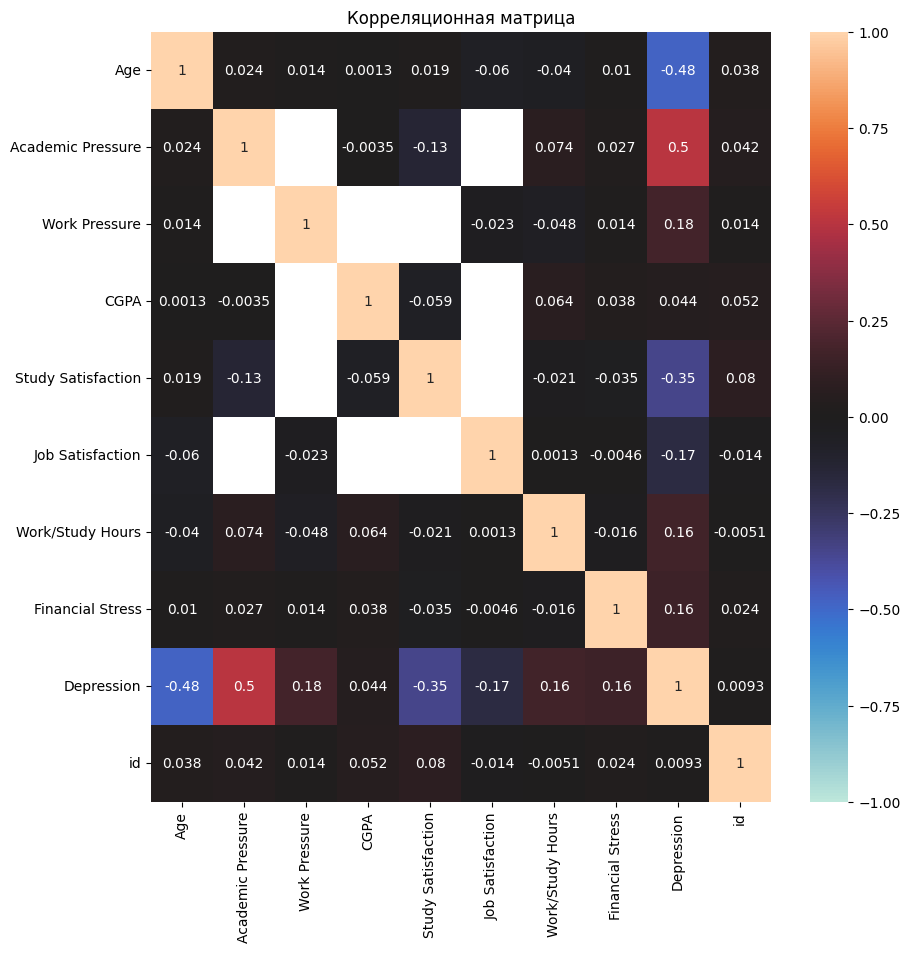

In [9]:
# Выбираем числовые колонки (включая Depression)
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
num_df = train_data[num_cols]

# Построение корреляционной матрицы
def corrplot(df, method="pearson", annot=True, **kwargs):
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        annot=annot,
        **kwargs,
    )
    plt.title("Корреляционная матрица")
    plt.show()

corrplot(num_df, annot=True)

Age, Academic Pressure, Work Pressure, Study Satisfaction — наиболее связанные с Depression признаки. Они будут важны для модели.
Мультиколлинеарности (корреляции >0.8 между признаками) нет, поэтому удалять признаки не нужно.

### Предобработка данных

In [10]:
# Удаляем ненужные стобцы - имя и гендер

train_data = train_data.drop(['Name', 'Gender'], axis=1)
train_data.head()

test_data = test_data.drop(['Name', 'Gender'], axis=1)

In [11]:
# Разделение данных
X = train_data.drop(['Depression', 'id'], axis=1)
y = train_data['Depression']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Определение числовых и категориальных признаков
num_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
            'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
cat_cols = train_data.select_dtypes(include=['object']).columns

Числовые признаки (num): заполним пропуски средним значением и масштабируем с помощью StandardScaler.

Категориальные признаки (cat): заполним пропуски модой, преобразуем категории в бинарные признаки с помощью OneHotEncoder.

In [13]:
# Пайплайн предобработки
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), num_cols),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop=None, handle_unknown='ignore'))
        ]), cat_cols)
    ])

(drop=None) - сохраним все категории и будем использовать L1-регуляризацию, которая автоматически обнулит менее важные признаки, выполняя отбор.

strategy='most_frequent'показала себя лучше чем strategy='constant', fill_value='NA'

Не добавляем новых категорий, которые могут ввести шум и ложные зависимости

StandardScaler показал себя лучше, чем RobustScaler, тк экстремальные выбросы в данных отсутсвуют.

In [14]:
# Пайплайн с моделью
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42))
])

L1-регуляризация выполняет отбор признаков, обнуляя незначимые веса

In [15]:
# Обучение модели
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['City', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [16]:
# Оценка
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
print(f"F1 на train: {f1_score(y_train, train_pred, average='weighted'):.5f}")
print(f"F1 на валидации: {f1_score(y_val, val_pred, average='weighted'):.5f}")

F1 на train: 0.99338
F1 на валидации: 0.99472


In [17]:
# Финальное обучение
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['City', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [18]:
# Предсказание на тесте
test_pred = model.predict(test_data.drop(['id'], axis=1))

In [19]:
# Создание submission
submission = pd.DataFrame({
    'id': test_data['id'],
    'Depression': test_pred
})
submission.to_csv('submission.csv', index=False)
print("\nФайл submission.csv успешно создан!")



Файл submission.csv успешно создан!
